# Understanding and Predicting Customer Behaviour

## 1.Problem Statement:

Predicting the Custoemr behaviour and Improving Customer engagement with Speacialized offers, Tailored plans and Schemes.

## 2.Importing Libraries

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 3.Reading the Data

In [79]:
df = pd.read_csv(r"C:\Users\ragas\Clustered_customer_data.csv", encoding = "utf-8")
df.head()

,Unnamed: 0,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters
0,0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,4494.44945,201.802084,864.206542,0.000000,12,1
1,1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,4494.44945,4103.032597,864.206542,0.222222,12,3
2,2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,4494.44945,622.066742,864.206542,0.000000,12,2
3,3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,4494.44945,0.000000,864.206542,0.000000,12,1
4,4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,4494.44945,678.334763,864.206542,0.000000,12,1


In [80]:
df.shape

(8950, 20)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8950 non-null   int64  
 1   CUST_ID                           8950 non-null   object 
 2   BALANCE                           8950 non-null   float64
 3   BALANCE_FREQUENCY                 8950 non-null   float64
 4   PURCHASES                         8950 non-null   float64
 5   ONEOFF_PURCHASES                  8950 non-null   float64
 6   INSTALLMENTS_PURCHASES            8950 non-null   float64
 7   CASH_ADVANCE                      8950 non-null   float64
 8   PURCHASES_FREQUENCY               8950 non-null   float64
 9   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 10  PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 11  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 12  CASH_A

In [82]:
df.drop(columns=["Unnamed: 0","CUST_ID"],axis=1,inplace=True)

In [83]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Clusters'],
      dtype='object')

In [84]:
df.shape

(8950, 18)

## 4.EDA

In [86]:
Cluster_summary = df.groupby(df['Clusters']).mean()
Cluster_summary

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Clusters,,,,,,,,,,,,,,,,,
0,3048.246680,0.973936,1521.461112,942.246746,579.432000,2400.007420,0.712965,0.334417,0.508117,0.321798,8.300339,23.429831,4494.44945,2823.976268,864.206542,0.044989,11.454237
1,339.341663,0.594825,356.169555,256.497215,100.218370,78.587729,0.300468,0.101830,0.185806,0.013867,0.229222,4.364743,4494.44945,714.998906,864.206542,0.164821,11.363684
2,1030.636908,0.963098,1895.979603,1061.485856,834.879034,15.586869,0.858806,0.341796,0.682385,0.005137,0.065459,27.925643,4494.44945,1856.658553,864.206542,0.291693,11.737846
3,2304.819640,0.926824,38.981558,35.867688,3.163756,2059.606975,0.027376,0.020805,0.005653,0.283939,6.640016,0.396474,4494.44945,1702.638409,864.206542,0.032834,11.389914


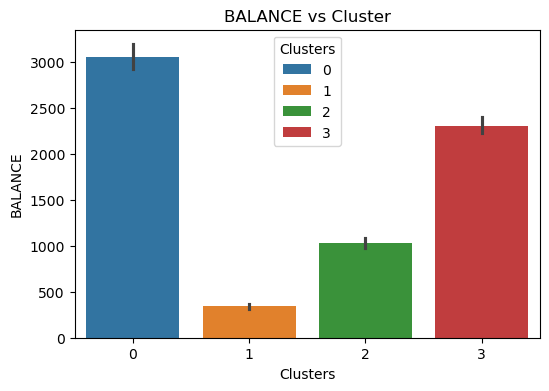

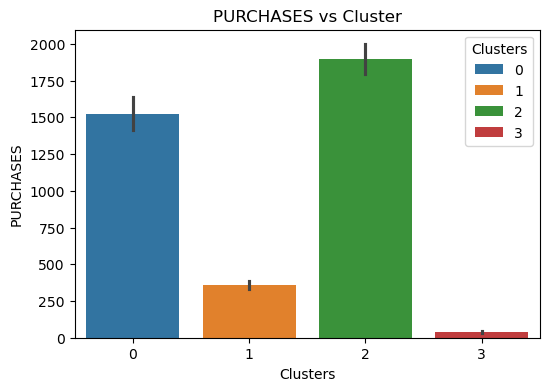

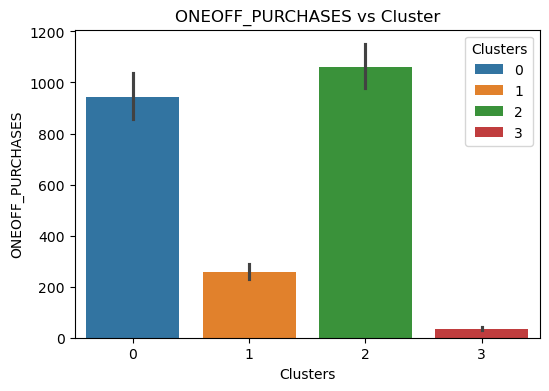

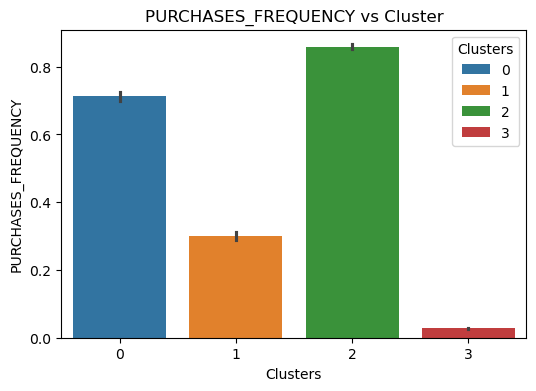

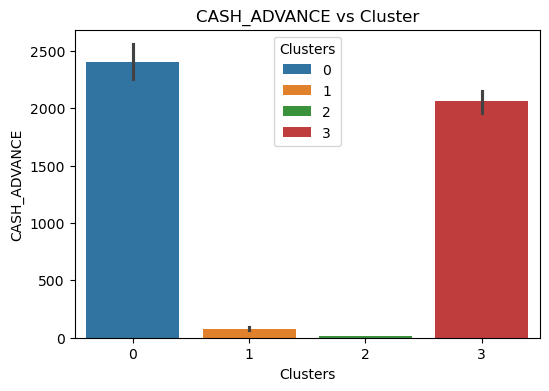

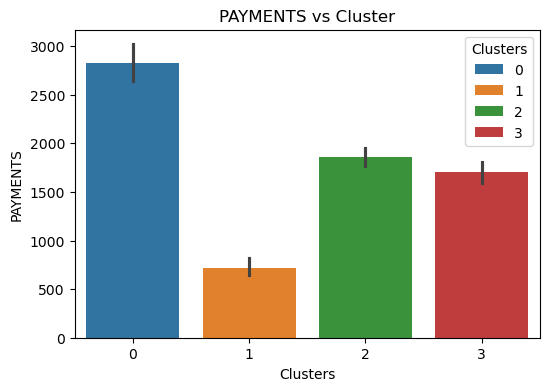

In [88]:
features = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE', 'PAYMENTS']

for feature in features:
    plt.figure(figsize=(6,4))
    sns.barplot(x="Clusters", y=feature, data=df, hue = "Clusters",palette = "tab10")
    plt.title(f"{feature} vs Cluster")
    plt.show() 


## Observation:
* Cluster 0 : Users who are very active in terms of Purchase, cash advance , balance etc..
* Cluster 1 : Users who are inactive
* Cluster 2: Users who spends more Purchasing.
* Cluster 3: Users who uses card for cash advance

In [90]:
df_copy = df.copy()

In [91]:
df_copy.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,4494.44945,201.802084,864.206542,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,4494.44945,4103.032597,864.206542,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,4494.44945,622.066742,864.206542,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,4494.44945,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,4494.44945,678.334763,864.206542,0.000000,12,1


## 5.Mapping the Clusters

In [93]:
cluster_map = {
    0 : "Highly Active User",
    1 : "Inactive User",
    2 : "High Spender",
    3 : "Cash Advance Takers"
}

df_copy['Clusters'] = df_copy['Clusters'].map(cluster_map)
df_copy.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,4494.44945,201.802084,864.206542,0.000000,12,Inactive User
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,4494.44945,4103.032597,864.206542,0.222222,12,Cash Advance Takers
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,4494.44945,622.066742,864.206542,0.000000,12,High Spender
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,4494.44945,0.000000,864.206542,0.000000,12,Inactive User
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,4494.44945,678.334763,864.206542,0.000000,12,Inactive User


## 6.Train Test Split

In [95]:
from sklearn.model_selection import train_test_split

X = df_copy.drop(columns = 'Clusters', axis=1)
y = df_copy['Clusters']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7160, 17), (1790, 17), (7160,), (1790,))

## 7.Standardizing the X_train data 

In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 8.Model Training and Performance Evaluation

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(criterion="entropy"),
    "RandomForestClassifier": RandomForestClassifier()
}

def evaluate_model(true,predicted):
    accuracy = accuracy_score(true,predicted)
    class_report = classification_report(true,predicted)
    return accuracy,class_report

model_list = []
accuracy_list = []
for name,model in models.items():
    model.fit(X_train_scaled,y_train)

    # Predicition
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    model_list.append(name)

    #Evaluate
    accuracy_train,classification_report_train = evaluate_model(y_train, y_train_pred)
    accuracy_test,classification_report_test = evaluate_model(y_test, y_test_pred)

    print(f"Model:{name}")
    print("Model performance for Training set")
    print("Accuracy: {:.4f}".format(accuracy_train))
    print("classification_report:\n",classification_report_train)
    print("------------------------------------------------------------------")

    print("Model performance for Test set")
    print("Accuracy: {:.4f}".format(accuracy_test))
    print("classification_report:\n",classification_report_train)

    accuracy_list.append(accuracy_test)
    
    print("*" * 80)
    print("\n")

Model:Logistic Regression
Model performance for Training set
Accuracy: 0.9610
classification_report:
                      precision    recall  f1-score   support

Cash Advance Takers       0.97      0.97      0.97      1965
       High Spender       0.97      0.97      0.97      2516
 Highly Active User       0.97      0.96      0.96      1171
      Inactive User       0.93      0.93      0.93      1508

           accuracy                           0.96      7160
          macro avg       0.96      0.96      0.96      7160
       weighted avg       0.96      0.96      0.96      7160

------------------------------------------------------------------
Model performance for Test set
Accuracy: 0.9631
classification_report:
                      precision    recall  f1-score   support

Cash Advance Takers       0.97      0.97      0.97      1965
       High Spender       0.97      0.97      0.97      2516
 Highly Active User       0.97      0.96      0.96      1171
      Inactive User    

## Observation:
#### * Accuracy of the all three models are above 95%
#### * Decision Tree we can observe that train set has 100% accuracy but test set has 95% accuracy (5% drop) it shows overfitting. 
#### * Random Forest Classifier has the top accuracy score of 97.2% with train accuracy of 100%.

# Result

In [102]:
pd.DataFrame(list(zip(model_list,accuracy_list)), columns=['Model','Accuracy_score']).sort_values(by=['Accuracy_score'],ascending=False)

,Model,Accuracy_score
2,RandomForestClassifier,0.972626
0,Logistic Regression,0.963128
1,Decision Tree Classifier,0.949721


In [113]:
Random_forest_model = RandomForestClassifier()
Random_forest_model.fit(X_train_scaled,y_train)
y_pred = Random_forest_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test,y_pred)*100
print("Accuracy of the model: {:.2f}".format(accuracy))


Accuracy of the model: 97.65


In [114]:
classes = np.unique(y_test)
classes

array(['Cash Advance Takers', 'High Spender', 'Highly Active User',
       'Inactive User'], dtype=object)

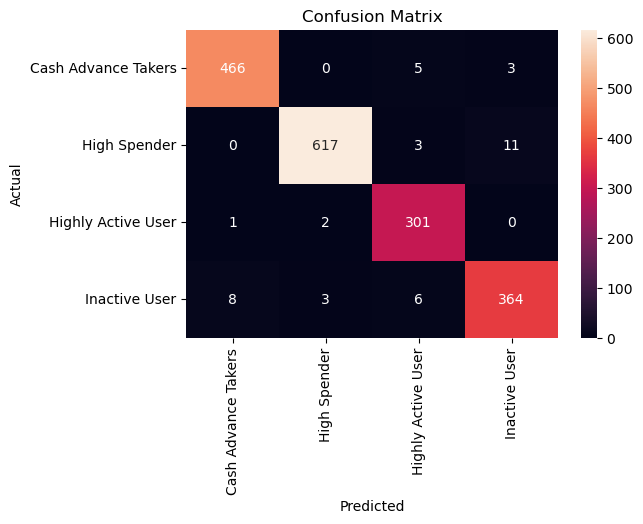

In [123]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
labels_name = ['Cash Advance Takers','High Spender','Highly Active User','Inactive User']

plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True, fmt='d',xticklabels=labels_name,yticklabels=labels_name)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()